In [10]:
import jieba            ##将连续的文本按照一定的规则切分成词语
from gensim import corpora, models
import re
import pandas as pd

import gensim  ####进行文本处理和自然语言处理
from gensim import corpora   ####建立语料库的工具，可以将文本集合转换为数字表示形式，方便后续的文本分析任务。
from gensim.models import LdaModel   ####潜在狄利克雷分布（LDA）主题模型算法，可以用于对文本数据进行主题建模分析。
from nltk.corpus import stopwords    ####常用的停用词列表，可以帮助我们去除文本中的无意义的常见单词，从而提高文本处理的效率和准确性。
from gensim.models import TfidfModel    ####文档向量化方法

from tqdm import tqdm  # 导入tqdm库
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import matplotlib



In [11]:
# 读取已分词的文本数据
with open('Cleaned_data.txt', 'r', encoding='utf-8') as file:    ###使用open()函数打开名为'New_Filtered_Data.txt'的文件，以只读模式（'r'）进行读取
    comments = file.readlines()             ###用于逐行读取文件内容，并将每一行作为一个字符串元素存储在列表comments中

# 将每个评论分词
tokenized_text = [comment.strip().split() for comment in comments]              ####strip()函数用于去除每个评论字符串两端的空白字符，split()函数将每个评论字符串按空格进行切割，生成一个包含分词结果的列表tokenized_text

# 选择词数大于20的文本数据
filtered_text = [doc for doc in tokenized_text if len(doc) > 20]    
##50/100/150数据
###使用列表推导式筛选出词数大于200的文本数据，将符合条件的文本数据存储在列表filtered_text中。

In [12]:
comments

['卧槽 吓死 真的 话题 说 事 \n',
 '国家 企业信用 信息 公示 系统 显示 浙江 农夫山泉 饮用水 有限公司 注销 网站 信息 显示 公司 法定代表 人为 钟 睒 睒 公司 成立 年月日 年月日 核准 注销 注销 原因 公司 合并 分立 \n',
 '近日 胡润 百富榜 发布 农夫山泉 钟 睒 睒 亿 第三次 中国 首富 腾讯 马化腾 继年 重回 拼 黄峥 亿 首次 位列 第三 去年 第二名 字节 跳动 张一鸣 下降 位 排名 第五 宁德 时代 曾毓群 去年 下降 一位 第四 继年 年 上榜 企业家 数量 财富 规模 下跌 胡润百富 董事长 兼 首席 调研 官胡润 胡润 百富榜 年 第二次 上榜 人数 连续 两年 减少 第一次 年 位 财富 亿元 人民币 企业家 登上 胡润 百富榜 去年 减少 人比 两年 前 减少 上榜 企业家 总 财富 去年 下降 万亿 万亿元 位 企业家 财富 去年 增长 包括 位 新人 胡润 补充 亿级 企业家 人数 疫情 前多 十年 前 百富榜 相比 榜单 新面孔 详见 胡润 百富榜 农夫山泉 钟 睒 睒 三度 蝉联 首富 马化腾 重回 黄峥 首次 跻身 前 三 财经 收起 \n',
 '月 日 胡润 研究院 发布 胡润 百富榜 显示 岁 农夫山泉 董事长 钟 睒 睒 亿元 连续 第三次 中国 首富 去年 缩水 腾讯 马化腾 亿元 重返 去年 位拼 创始人 黄峥 财富 去年 增长 亿元 榜单 财富 增长 最多 企业家 亿元 首次 前 三 胡润百富 董事长 兼 首席 调研 官胡润 一年 财富 增长 企业家 在线 游戏 半导体 软件 服务 特别 网络安全 食品饮料 特别 饮料 餐饮行业 财富 下降 企业家 房地产 光伏 产业 钢铁行业 收起 \n',
 '农夫山泉 老板 钟 睒 睒 身价 亿美元 位居 中国 第一 世界 排名第 \n',
 '中国 富豪 排名 公布 农夫山泉 钟 睒 睒 排名 第一 资产 亿 黄峥 第三 马化腾 第四 张一鸣 \n',
 '骨泥 淀粉 改 吃 平时 总 吃 农夫山泉 事件 日本 虚伪 丧 良心 企业家 沾边 包括 浙江 卫视 丧 良心 罔顾 人民 事件 再也 看过 浙江 卫视 \n',
 '日本 零售 企业 伊藤 洋华堂 所属 便利店 水冲 龙王庙 冷暖 视频 微博 视频 \n',
 '日本 企业 

In [13]:
filtered_text 

[['国家',
  '企业信用',
  '信息',
  '公示',
  '系统',
  '显示',
  '浙江',
  '农夫山泉',
  '饮用水',
  '有限公司',
  '注销',
  '网站',
  '信息',
  '显示',
  '公司',
  '法定代表',
  '人为',
  '钟',
  '睒',
  '睒',
  '公司',
  '成立',
  '年月日',
  '年月日',
  '核准',
  '注销',
  '注销',
  '原因',
  '公司',
  '合并',
  '分立'],
 ['近日',
  '胡润',
  '百富榜',
  '发布',
  '农夫山泉',
  '钟',
  '睒',
  '睒',
  '亿',
  '第三次',
  '中国',
  '首富',
  '腾讯',
  '马化腾',
  '继年',
  '重回',
  '拼',
  '黄峥',
  '亿',
  '首次',
  '位列',
  '第三',
  '去年',
  '第二名',
  '字节',
  '跳动',
  '张一鸣',
  '下降',
  '位',
  '排名',
  '第五',
  '宁德',
  '时代',
  '曾毓群',
  '去年',
  '下降',
  '一位',
  '第四',
  '继年',
  '年',
  '上榜',
  '企业家',
  '数量',
  '财富',
  '规模',
  '下跌',
  '胡润百富',
  '董事长',
  '兼',
  '首席',
  '调研',
  '官胡润',
  '胡润',
  '百富榜',
  '年',
  '第二次',
  '上榜',
  '人数',
  '连续',
  '两年',
  '减少',
  '第一次',
  '年',
  '位',
  '财富',
  '亿元',
  '人民币',
  '企业家',
  '登上',
  '胡润',
  '百富榜',
  '去年',
  '减少',
  '人比',
  '两年',
  '前',
  '减少',
  '上榜',
  '企业家',
  '总',
  '财富',
  '去年',
  '下降',
  '万亿',
  '万亿元',
  '位',
  '企业家',
  '财富',
  '去年',
  '增长',
  '包括',
  '位',
 

In [14]:
# 创建语料库和字典
dictionary = corpora.Dictionary(filtered_text)             # corpora.Dictionary() 函数创建一个空的字典对象 dictionary。它将被用来存储语料库中出现的所有单词及其对应的唯一整数 ID
corpus = [dictionary.doc2bow(text) for text in filtered_text]
###dictionary.doc2bow(text) 方法将经过预处理（例如去除停用词、标点符号等）的每个文档 text 转换为一个词袋（bag of words），
# 即将文档表示为一个词频向量。此处将所有文档的词袋组成一个列表，并赋给变量 corpus。       

In [16]:
# 构建并训练LDA模型
num_topics = 2  # 指定主题数目
lda_model_2 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=3,  random_state=42)

In [17]:
# 输出LDA主题
topics_2 = lda_model_2.print_topics(num_words=10)
for topic in topics_2:
    print(topic)

(0, '0.034*"农夫山泉" + 0.020*"睒" + 0.010*"钟" + 0.009*"中国" + 0.008*"收起" + 0.008*"娃哈哈" + 0.007*"美国" + 0.006*"日本" + 0.006*"说" + 0.005*"首富"')
(1, '0.023*"农夫山泉" + 0.011*"中国" + 0.011*"睒" + 0.008*"钟" + 0.007*"收起" + 0.007*"企业" + 0.005*"娃哈哈" + 0.005*"美国" + 0.005*"说" + 0.005*"财富"')


In [18]:
num_topics = 3  # 指定主题数目
lda_model_3 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,passes=10,  random_state=42)
topics_3 = lda_model_3.print_topics(num_words=10)
for topic in topics_3:
    print(topic)

(0, '0.037*"农夫山泉" + 0.017*"睒" + 0.012*"娃哈哈" + 0.009*"钟" + 0.009*"日本" + 0.008*"收起" + 0.008*"中国" + 0.007*"美国" + 0.006*"说" + 0.005*"产品"')
(1, '0.026*"农夫山泉" + 0.017*"睒" + 0.012*"中国" + 0.011*"钟" + 0.008*"企业" + 0.007*"收起" + 0.007*"娃哈哈" + 0.006*"美国" + 0.006*"股价" + 0.005*"说"')
(2, '0.022*"农夫山泉" + 0.015*"睒" + 0.012*"中国" + 0.010*"亿元" + 0.009*"财富" + 0.008*"收起" + 0.007*"首富" + 0.007*"钟" + 0.006*"美国" + 0.005*"说"')


In [19]:
num_topics = 4  # 指定主题数目
lda_model_4 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,passes=10,  random_state=42)
topics_4 = lda_model_4.print_topics(num_words=10)
for topic in topics_4:
    print(topic)

(0, '0.032*"农夫山泉" + 0.015*"娃哈哈" + 0.010*"日本" + 0.009*"睒" + 0.008*"收起" + 0.008*"说" + 0.007*"喝" + 0.006*"美国" + 0.006*"中国" + 0.006*"钟"')
(1, '0.018*"农夫山泉" + 0.010*"娃哈哈" + 0.007*"企业" + 0.007*"中国" + 0.006*"收起" + 0.005*"说" + 0.005*"日本" + 0.005*"睒" + 0.005*"钟" + 0.004*"产品"')
(2, '0.018*"农夫山泉" + 0.015*"睒" + 0.012*"财富" + 0.010*"亿元" + 0.010*"中国" + 0.008*"收起" + 0.008*"钟" + 0.007*"首富" + 0.006*"去年" + 0.006*"胡润"')
(3, '0.038*"农夫山泉" + 0.027*"睒" + 0.015*"中国" + 0.015*"钟" + 0.011*"美国" + 0.008*"收起" + 0.007*"首富" + 0.007*"股价" + 0.006*"企业" + 0.005*"年"')


In [20]:
num_topics = 5  # 指定主题数目
lda_model_5 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,passes=10,  random_state=42)
topics_5 = lda_model_5.print_topics(num_words=10)
for topic in topics_5:
    print(topic)

(0, '0.034*"农夫山泉" + 0.017*"娃哈哈" + 0.011*"日本" + 0.010*"睒" + 0.008*"收起" + 0.008*"说" + 0.007*"中国" + 0.007*"喝" + 0.007*"美国" + 0.006*"钟"')
(1, '0.018*"农夫山泉" + 0.009*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.006*"日本" + 0.006*"说" + 0.006*"收起" + 0.005*"睒" + 0.005*"钟" + 0.005*"产品"')
(2, '0.018*"农夫山泉" + 0.017*"睒" + 0.013*"财富" + 0.011*"亿元" + 0.011*"中国" + 0.008*"收起" + 0.008*"钟" + 0.007*"首富" + 0.007*"去年" + 0.007*"胡润"')
(3, '0.041*"农夫山泉" + 0.029*"睒" + 0.016*"钟" + 0.016*"中国" + 0.011*"美国" + 0.008*"首富" + 0.008*"收起" + 0.008*"股价" + 0.006*"年" + 0.005*"月"')
(4, '0.011*"农夫山泉" + 0.005*"收起" + 0.005*"说" + 0.004*"美国" + 0.004*"睒" + 0.003*"已阅" + 0.003*"娃哈哈" + 0.003*"中" + 0.003*"日本" + 0.003*"国家"')


In [21]:
num_topics = 6  # 指定主题数目
lda_model_6 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)
topics_6 = lda_model_6.print_topics(num_words=10)
for topic in topics_6:
    print(topic)

(0, '0.034*"农夫山泉" + 0.020*"娃哈哈" + 0.010*"睒" + 0.010*"日本" + 0.008*"说" + 0.008*"喝" + 0.008*"收起" + 0.007*"美国" + 0.007*"中国" + 0.007*"钟"')
(1, '0.020*"农夫山泉" + 0.011*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.006*"说" + 0.006*"收起" + 0.005*"睒" + 0.005*"产品" + 0.005*"钟" + 0.005*"日本"')
(2, '0.025*"农夫山泉" + 0.009*"收起" + 0.007*"生肖" + 0.007*"卖" + 0.006*"说" + 0.006*"水" + 0.006*"喝" + 0.006*"送" + 0.005*"瓶" + 0.005*"玻璃瓶"')
(3, '0.038*"农夫山泉" + 0.016*"中国" + 0.015*"美国" + 0.014*"睒" + 0.009*"钟" + 0.007*"收起" + 0.007*"企业" + 0.007*"日本" + 0.005*"说" + 0.005*"儿子"')
(4, '0.012*"农夫山泉" + 0.005*"收起" + 0.004*"娃哈哈" + 0.004*"说" + 0.003*"已阅" + 0.003*"美国" + 0.003*"中" + 0.002*"超话" + 0.002*"喝" + 0.002*"国家"')
(5, '0.044*"睒" + 0.027*"农夫山泉" + 0.022*"钟" + 0.016*"亿元" + 0.014*"首富" + 0.014*"中国" + 0.013*"财富" + 0.009*"收起" + 0.009*"股价" + 0.008*"月"')


In [22]:
num_topics = 7  # 指定主题数目
lda_model_7 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)
topics_7 = lda_model_7.print_topics(num_words=10)
for topic in topics_7:
    print(topic)

(0, '0.035*"农夫山泉" + 0.020*"娃哈哈" + 0.009*"喝" + 0.009*"收起" + 0.008*"日本" + 0.007*"睒" + 0.007*"水" + 0.007*"说" + 0.006*"美国" + 0.006*"买"')
(1, '0.018*"农夫山泉" + 0.011*"娃哈哈" + 0.007*"企业" + 0.006*"中国" + 0.006*"产品" + 0.006*"收起" + 0.004*"钟" + 0.004*"说" + 0.004*"日本" + 0.004*"睒"')
(2, '0.025*"农夫山泉" + 0.009*"收起" + 0.008*"生肖" + 0.007*"水" + 0.007*"卖" + 0.007*"送" + 0.006*"喝" + 0.006*"说" + 0.006*"瓶" + 0.005*"玻璃瓶"')
(3, '0.036*"农夫山泉" + 0.016*"中国" + 0.016*"美国" + 0.011*"睒" + 0.007*"钟" + 0.007*"收起" + 0.007*"企业" + 0.007*"日本" + 0.005*"说" + 0.005*"产品"')
(4, '0.011*"农夫山泉" + 0.005*"已阅" + 0.005*"收起" + 0.004*"说" + 0.003*"喝" + 0.003*"品牌" + 0.003*"国家" + 0.003*"中" + 0.002*"娃哈哈" + 0.002*"爱国"')
(5, '0.045*"睒" + 0.028*"农夫山泉" + 0.023*"钟" + 0.017*"亿元" + 0.014*"财富" + 0.014*"首富" + 0.014*"中国" + 0.010*"股价" + 0.009*"月" + 0.009*"收起"')
(6, '0.032*"农夫山泉" + 0.017*"睒" + 0.013*"中国" + 0.011*"钟" + 0.010*"日本" + 0.009*"娃哈哈" + 0.009*"说" + 0.009*"美国" + 0.007*"企业" + 0.007*"收起"')


In [23]:
num_topics = 8  # 指定主题数目
lda_model_8 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,passes=10,  random_state=42)
topics_8 = lda_model_8.print_topics(num_words=10)
for topic in topics_8:
    print(topic)

(0, '0.037*"农夫山泉" + 0.022*"娃哈哈" + 0.011*"睒" + 0.009*"收起" + 0.009*"日本" + 0.007*"钟" + 0.006*"美国" + 0.006*"喝" + 0.006*"说" + 0.005*"中国"')
(1, '0.020*"农夫山泉" + 0.010*"娃哈哈" + 0.007*"产品" + 0.007*"企业" + 0.007*"中国" + 0.006*"收起" + 0.006*"日本" + 0.004*"股价" + 0.004*"说" + 0.004*"没"')
(2, '0.022*"农夫山泉" + 0.008*"说" + 0.008*"收起" + 0.007*"中国" + 0.006*"喝" + 0.005*"买" + 0.005*"美国" + 0.005*"日本" + 0.005*"抵制" + 0.005*"爱国"')
(3, '0.033*"农夫山泉" + 0.017*"中国" + 0.016*"美国" + 0.013*"睒" + 0.008*"钟" + 0.008*"企业" + 0.007*"收起" + 0.005*"日本" + 0.005*"品牌" + 0.005*"说"')
(4, '0.011*"农夫山泉" + 0.005*"已阅" + 0.005*"收起" + 0.004*"超话" + 0.004*"说" + 0.003*"国家" + 0.003*"中" + 0.003*"娃哈哈" + 0.003*"情绪" + 0.003*"群体"')
(5, '0.048*"睒" + 0.029*"农夫山泉" + 0.024*"钟" + 0.020*"亿元" + 0.016*"财富" + 0.016*"首富" + 0.015*"中国" + 0.010*"股价" + 0.009*"月" + 0.009*"收起"')
(6, '0.034*"农夫山泉" + 0.015*"睒" + 0.012*"中国" + 0.011*"日本" + 0.010*"钟" + 0.009*"娃哈哈" + 0.009*"说" + 0.008*"美国" + 0.007*"收起" + 0.007*"企业"')
(7, '0.024*"农夫山泉" + 0.010*"水" + 0.009*"收起" + 0.009*"生肖" +

In [24]:
num_topics = 9  # 指定主题数目
lda_model_9 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)
topics_9 = lda_model_9.print_topics(num_words=10)
for topic in topics_9:
    print(topic)

(0, '0.038*"农夫山泉" + 0.024*"娃哈哈" + 0.009*"睒" + 0.009*"日本" + 0.009*"收起" + 0.009*"美国" + 0.007*"喝" + 0.006*"中国" + 0.006*"钟" + 0.006*"说"')
(1, '0.020*"农夫山泉" + 0.009*"娃哈哈" + 0.008*"企业" + 0.008*"中国" + 0.006*"产品" + 0.006*"日本" + 0.005*"收起" + 0.005*"股价" + 0.004*"说" + 0.004*"钟"')
(2, '0.022*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.007*"日本" + 0.006*"中国" + 0.005*"喝" + 0.005*"抵制" + 0.005*"买" + 0.005*"美国" + 0.004*"爱国"')
(3, '0.036*"农夫山泉" + 0.017*"中国" + 0.016*"美国" + 0.013*"睒" + 0.009*"企业" + 0.008*"钟" + 0.007*"收起" + 0.006*"说" + 0.005*"日本" + 0.005*"品牌"')
(4, '0.011*"农夫山泉" + 0.006*"已阅" + 0.004*"收起" + 0.004*"说" + 0.003*"国家" + 0.003*"美国" + 0.003*"品牌" + 0.003*"价值观" + 0.003*"中" + 0.003*"喝"')
(5, '0.027*"农夫山泉" + 0.024*"睒" + 0.012*"钟" + 0.007*"收起" + 0.006*"月" + 0.006*"说" + 0.005*"日" + 0.005*"日本" + 0.005*"浙江" + 0.005*"有限公司"')
(6, '0.034*"农夫山泉" + 0.013*"睒" + 0.010*"中国" + 0.009*"日本" + 0.009*"钟" + 0.009*"娃哈哈" + 0.009*"说" + 0.007*"收起" + 0.006*"企业" + 0.006*"美国"')
(7, '0.025*"农夫山泉" + 0.011*"水" + 0.010*"卖" + 0.010*"生肖" + 0

In [25]:
num_topics = 10  # 指定主题数目
lda_model_10 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_10 = lda_model_10.print_topics(num_words=10)
for topic in topics_10:
    print(topic)

(0, '0.040*"农夫山泉" + 0.024*"娃哈哈" + 0.010*"睒" + 0.009*"收起" + 0.008*"喝" + 0.008*"日本" + 0.007*"美国" + 0.006*"水" + 0.006*"买" + 0.005*"说"')
(1, '0.020*"农夫山泉" + 0.012*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.007*"产品" + 0.006*"收起" + 0.006*"日本" + 0.005*"说" + 0.004*"股价" + 0.004*"没"')
(2, '0.021*"农夫山泉" + 0.009*"中国" + 0.008*"说" + 0.007*"收起" + 0.007*"美国" + 0.007*"抵制" + 0.007*"日本" + 0.006*"爱国" + 0.006*"喝" + 0.005*"买"')
(3, '0.039*"农夫山泉" + 0.016*"中国" + 0.016*"美国" + 0.009*"睒" + 0.008*"企业" + 0.007*"收起" + 0.006*"品牌" + 0.006*"日本" + 0.006*"钟" + 0.006*"说"')
(4, '0.011*"农夫山泉" + 0.004*"收起" + 0.004*"说" + 0.004*"超话" + 0.003*"品牌" + 0.003*"喝" + 0.003*"中" + 0.003*"国家" + 0.002*"爱国" + 0.002*"消费"')
(5, '0.026*"农夫山泉" + 0.020*"睒" + 0.010*"钟" + 0.007*"日本" + 0.007*"收起" + 0.007*"说" + 0.005*"月" + 0.004*"日" + 0.004*"爱国" + 0.003*"有限公司"')
(6, '0.035*"农夫山泉" + 0.011*"睒" + 0.011*"日本" + 0.010*"中国" + 0.010*"说" + 0.010*"娃哈哈" + 0.008*"钟" + 0.007*"美国" + 0.007*"收起" + 0.006*"企业"')
(7, '0.025*"农夫山泉" + 0.011*"水" + 0.010*"生肖" + 0.010*"卖" + 0.0

In [26]:
num_topics = 11  # 指定主题数目
lda_model_11 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_11 = lda_model_11.print_topics(num_words=10)
for topic in topics_11:
    print(topic)

(0, '0.041*"农夫山泉" + 0.028*"娃哈哈" + 0.009*"睒" + 0.009*"收起" + 0.006*"美国" + 0.006*"水" + 0.006*"喝" + 0.006*"日" + 0.005*"买" + 0.005*"钟"')
(1, '0.019*"农夫山泉" + 0.011*"娃哈哈" + 0.008*"企业" + 0.007*"产品" + 0.006*"中国" + 0.006*"收起" + 0.004*"股价" + 0.004*"日本" + 0.004*"说" + 0.004*"停售"')
(2, '0.021*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.005*"美国" + 0.005*"中国" + 0.004*"抵制" + 0.004*"日本" + 0.004*"买" + 0.004*"喝" + 0.004*"公司"')
(3, '0.041*"农夫山泉" + 0.015*"美国" + 0.014*"中国" + 0.010*"睒" + 0.008*"企业" + 0.008*"收起" + 0.006*"钟" + 0.006*"产品" + 0.005*"品牌" + 0.005*"日本"')
(4, '0.012*"农夫山泉" + 0.007*"已阅" + 0.004*"超话" + 0.004*"说" + 0.004*"娃哈哈" + 0.004*"收起" + 0.003*"爱国" + 0.003*"喝" + 0.003*"国家" + 0.003*"美国"')
(5, '0.027*"农夫山泉" + 0.026*"睒" + 0.013*"钟" + 0.008*"收起" + 0.007*"浙江" + 0.007*"月" + 0.007*"有限公司" + 0.006*"日" + 0.006*"说" + 0.006*"公司"')
(6, '0.040*"农夫山泉" + 0.015*"睒" + 0.011*"钟" + 0.010*"中国" + 0.009*"娃哈哈" + 0.008*"说" + 0.008*"股价" + 0.007*"收起" + 0.007*"美国" + 0.006*"首富"')
(7, '0.025*"农夫山泉" + 0.012*"水" + 0.011*"生肖" + 0.011*"卖" + 

In [27]:
num_topics = 12  # 指定主题数目
lda_model_12 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_12 = lda_model_12.print_topics(num_words=10)
for topic in topics_12:
    print(topic)

(0, '0.039*"农夫山泉" + 0.031*"娃哈哈" + 0.009*"收起" + 0.008*"睒" + 0.008*"美国" + 0.008*"喝" + 0.007*"水" + 0.006*"买" + 0.005*"说" + 0.005*"钟"')
(1, '0.021*"农夫山泉" + 0.008*"娃哈哈" + 0.007*"股价" + 0.007*"中国" + 0.007*"企业" + 0.006*"收起" + 0.006*"日本" + 0.006*"产品" + 0.004*"说" + 0.004*"公司"')
(2, '0.018*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.006*"中国" + 0.006*"抵制" + 0.005*"喝" + 0.005*"美国" + 0.005*"买" + 0.004*"爱国" + 0.004*"日本"')
(3, '0.036*"农夫山泉" + 0.022*"美国" + 0.018*"中国" + 0.009*"睒" + 0.009*"企业" + 0.007*"儿子" + 0.007*"收起" + 0.006*"钟" + 0.005*"国籍" + 0.005*"说"')
(4, '0.012*"农夫山泉" + 0.005*"说" + 0.005*"美国" + 0.004*"收起" + 0.004*"喝" + 0.004*"国家" + 0.003*"爱国" + 0.003*"中" + 0.003*"企业" + 0.003*"超话"')
(5, '0.020*"农夫山泉" + 0.010*"说" + 0.009*"睒" + 0.007*"收起" + 0.005*"钟" + 0.004*"日本" + 0.004*"买" + 0.004*"刘宇宁" + 0.004*"娃哈哈" + 0.003*"喝"')
(6, '0.037*"农夫山泉" + 0.010*"娃哈哈" + 0.009*"中国" + 0.009*"说" + 0.008*"睒" + 0.007*"企业" + 0.007*"钟" + 0.007*"收起" + 0.006*"美国" + 0.006*"日本"')
(7, '0.025*"农夫山泉" + 0.014*"水" + 0.013*"卖" + 0.013*"生肖" + 0.0

In [28]:
num_topics = 13  # 指定主题数目
lda_model_13 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_13 = lda_model_13.print_topics(num_words=10)
for topic in topics_13:
    print(topic)

(0, '0.041*"农夫山泉" + 0.030*"娃哈哈" + 0.009*"睒" + 0.009*"收起" + 0.008*"喝" + 0.007*"美国" + 0.007*"水" + 0.006*"买" + 0.005*"说" + 0.005*"产品"')
(1, '0.025*"农夫山泉" + 0.011*"娃哈哈" + 0.008*"中国" + 0.008*"产品" + 0.007*"企业" + 0.006*"股价" + 0.006*"收起" + 0.006*"说" + 0.005*"买" + 0.004*"停售"')
(2, '0.021*"农夫山泉" + 0.009*"喝" + 0.007*"说" + 0.007*"中国" + 0.007*"收起" + 0.007*"美国" + 0.006*"抵制" + 0.006*"买" + 0.006*"日本" + 0.004*"企业"')
(3, '0.038*"农夫山泉" + 0.019*"美国" + 0.017*"中国" + 0.010*"睒" + 0.008*"收起" + 0.007*"钟" + 0.007*"企业" + 0.006*"儿子" + 0.006*"说" + 0.005*"国籍"')
(4, '0.014*"农夫山泉" + 0.006*"美国" + 0.006*"收起" + 0.005*"说" + 0.004*"国家" + 0.004*"企业" + 0.003*"娃哈哈" + 0.003*"爱国" + 0.003*"想" + 0.003*"钱"')
(5, '0.020*"农夫山泉" + 0.013*"睒" + 0.009*"说" + 0.007*"收起" + 0.006*"钟" + 0.004*"爱国" + 0.004*"刘宇宁" + 0.003*"股价" + 0.003*"买" + 0.003*"老板"')
(6, '0.036*"农夫山泉" + 0.015*"睒" + 0.011*"钟" + 0.011*"娃哈哈" + 0.011*"中国" + 0.009*"说" + 0.008*"企业" + 0.008*"美国" + 0.007*"收起" + 0.006*"儿子"')
(7, '0.026*"农夫山泉" + 0.014*"水" + 0.014*"卖" + 0.013*"生肖" + 0.

In [29]:
num_topics = 14  # 指定主题数目
lda_model_14 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_14 = lda_model_14.print_topics(num_words=10)
for topic in topics_14:
    print(topic)

(0, '0.039*"农夫山泉" + 0.028*"娃哈哈" + 0.011*"美国" + 0.010*"睒" + 0.009*"收起" + 0.007*"喝" + 0.006*"买" + 0.006*"水" + 0.006*"网友" + 0.005*"儿子"')
(1, '0.024*"农夫山泉" + 0.009*"中国" + 0.009*"娃哈哈" + 0.008*"股价" + 0.008*"企业" + 0.007*"产品" + 0.007*"收起" + 0.004*"日本" + 0.004*"停售" + 0.004*"说"')
(2, '0.022*"农夫山泉" + 0.008*"中国" + 0.007*"收起" + 0.007*"说" + 0.006*"美国" + 0.006*"抵制" + 0.006*"日本" + 0.004*"喝" + 0.004*"娃哈哈" + 0.004*"市场"')
(3, '0.038*"农夫山泉" + 0.016*"美国" + 0.015*"中国" + 0.009*"企业" + 0.008*"睒" + 0.007*"收起" + 0.006*"钟" + 0.005*"说" + 0.005*"市场" + 0.005*"日本"')
(4, '0.010*"农夫山泉" + 0.004*"收起" + 0.004*"中" + 0.004*"娃哈哈" + 0.003*"孩子" + 0.003*"说" + 0.003*"家长" + 0.003*"国家" + 0.003*"消费" + 0.003*"扔"')
(5, '0.029*"农夫山泉" + 0.012*"睒" + 0.010*"说" + 0.009*"股价" + 0.008*"收起" + 0.007*"日" + 0.007*"钟" + 0.007*"亿港元" + 0.007*"市值" + 0.006*"月"')
(6, '0.036*"农夫山泉" + 0.011*"睒" + 0.011*"中国" + 0.010*"娃哈哈" + 0.009*"说" + 0.009*"钟" + 0.008*"美国" + 0.007*"收起" + 0.006*"儿子" + 0.006*"企业"')
(7, '0.027*"农夫山泉" + 0.015*"水" + 0.014*"卖" + 0.014*"生肖" +

In [30]:
num_topics = 15  # 指定主题数目
lda_model_15 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_15 = lda_model_15.print_topics(num_words=10)
for topic in topics_15:
    print(topic)

(0, '0.039*"农夫山泉" + 0.030*"娃哈哈" + 0.012*"睒" + 0.010*"美国" + 0.009*"收起" + 0.009*"喝" + 0.007*"买" + 0.007*"水" + 0.006*"钟" + 0.005*"儿子"')
(1, '0.022*"农夫山泉" + 0.011*"娃哈哈" + 0.010*"股价" + 0.009*"企业" + 0.008*"产品" + 0.007*"中国" + 0.006*"收起" + 0.005*"亿" + 0.004*"公司" + 0.004*"停售"')
(2, '0.021*"农夫山泉" + 0.007*"抵制" + 0.007*"收起" + 0.007*"中国" + 0.006*"说" + 0.005*"日本" + 0.005*"美国" + 0.005*"喝" + 0.004*"想" + 0.004*"娃哈哈"')
(3, '0.039*"农夫山泉" + 0.024*"美国" + 0.018*"中国" + 0.011*"企业" + 0.009*"睒" + 0.008*"儿子" + 0.007*"收起" + 0.007*"品牌" + 0.007*"钟" + 0.006*"说"')
(4, '0.010*"农夫山泉" + 0.005*"说" + 0.004*"收起" + 0.004*"喝" + 0.003*"家长" + 0.002*"想" + 0.002*"买" + 0.002*"做" + 0.002*"喜欢" + 0.002*"新"')
(5, '0.031*"农夫山泉" + 0.015*"睒" + 0.012*"股价" + 0.008*"月" + 0.008*"日" + 0.008*"钟" + 0.008*"收起" + 0.007*"亿港元" + 0.007*"市值" + 0.007*"说"')
(6, '0.039*"农夫山泉" + 0.016*"睒" + 0.012*"中国" + 0.012*"钟" + 0.012*"娃哈哈" + 0.010*"说" + 0.007*"收起" + 0.007*"首富" + 0.007*"企业" + 0.007*"美国"')
(7, '0.028*"农夫山泉" + 0.015*"水" + 0.015*"生肖" + 0.014*"送" + 0.013

In [ ]:
num_topics = 20 # 指定主题数目
lda_model_20 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_20 = lda_model_20.print_topics(num_words=10)
for topic in topics_20:
    print(topic)

In [ ]:
num_topics = 25  # 指定主题数目
lda_model_25 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_25 = lda_model_25.print_topics(num_words=10)
for topic in topics_25:
    print(topic)

In [ ]:
num_topics = 30  # 指定主题数目
lda_model_30 = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10,  random_state=42)  ###passes 迭代次数太少了
topics_30 = lda_model_30.print_topics(num_words=10)
for topic in topics_30:
    print(topic)

In [31]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import matplotlib

In [32]:
#困惑度越低或者一致性越高说明模型越好。一些研究表明perplexity并不是一个好的指标，
#所以一般我用coherence来评价模型并选择最优主题
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=10,random_state = 42)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=filtered_text, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()

In [37]:
import time
from progressbar import *
total = 1000
def test_func():
    time.sleep(0.01)
widgets = [
    'Progress: ',
    Percentage(), ' ',
    Bar('#'), ' ',
    Timer(), ' ',
    ETA(), ' ',
    FileTransferSpeed()
]
bar = ProgressBar(widgets=widgets, maxval=10 * total).start()
for i in range(total):
    bar.update(10 * i + 1)
    test_func()
bar.finish()


Progress: 100% |##############| Elapsed Time: 0:00:10 Time: 0:00:10 913.88  B/s


计算coherence:   0%|          | 0/15 [00:00<?, ?it/s]

[(0, '0.029*"农夫山泉" + 0.016*"睒" + 0.010*"中国" + 0.009*"钟" + 0.008*"收起" + 0.007*"娃哈哈" + 0.006*"美国" + 0.005*"日本" + 0.005*"说" + 0.005*"首富"')]


计算coherence:   7%|▋         | 1/15 [00:16<03:49, 16.39s/it]

0.3401452593454963
[(0, '0.035*"农夫山泉" + 0.017*"睒" + 0.009*"娃哈哈" + 0.009*"钟" + 0.008*"收起" + 0.007*"中国" + 0.007*"日本" + 0.007*"美国" + 0.006*"说" + 0.005*"喝"'), (1, '0.022*"农夫山泉" + 0.015*"睒" + 0.013*"中国" + 0.010*"钟" + 0.007*"收起" + 0.007*"首富" + 0.007*"企业" + 0.007*"财富" + 0.006*"美国" + 0.006*"亿元"')]


计算coherence:  13%|█▎        | 2/15 [00:57<06:43, 31.06s/it]

0.3764888257770472
[(0, '0.037*"农夫山泉" + 0.017*"睒" + 0.012*"娃哈哈" + 0.009*"钟" + 0.009*"日本" + 0.008*"收起" + 0.008*"中国" + 0.007*"美国" + 0.006*"说" + 0.005*"产品"'), (1, '0.026*"农夫山泉" + 0.017*"睒" + 0.012*"中国" + 0.011*"钟" + 0.008*"企业" + 0.007*"收起" + 0.007*"娃哈哈" + 0.006*"美国" + 0.006*"股价" + 0.005*"说"'), (2, '0.022*"农夫山泉" + 0.015*"睒" + 0.012*"中国" + 0.010*"亿元" + 0.009*"财富" + 0.008*"收起" + 0.007*"首富" + 0.007*"钟" + 0.006*"美国" + 0.005*"说"')]


计算coherence:  20%|██        | 3/15 [01:42<07:27, 37.28s/it]

0.3892350559280648
[(0, '0.032*"农夫山泉" + 0.015*"娃哈哈" + 0.010*"日本" + 0.009*"睒" + 0.008*"收起" + 0.008*"说" + 0.007*"喝" + 0.006*"美国" + 0.006*"中国" + 0.006*"钟"'), (1, '0.018*"农夫山泉" + 0.010*"娃哈哈" + 0.007*"企业" + 0.007*"中国" + 0.006*"收起" + 0.005*"说" + 0.005*"日本" + 0.005*"睒" + 0.005*"钟" + 0.004*"产品"'), (2, '0.018*"农夫山泉" + 0.015*"睒" + 0.012*"财富" + 0.010*"亿元" + 0.010*"中国" + 0.008*"收起" + 0.008*"钟" + 0.007*"首富" + 0.006*"去年" + 0.006*"胡润"'), (3, '0.038*"农夫山泉" + 0.027*"睒" + 0.015*"中国" + 0.015*"钟" + 0.011*"美国" + 0.008*"收起" + 0.007*"首富" + 0.007*"股价" + 0.006*"企业" + 0.005*"年"')]
0.38562751071101964


计算coherence:  27%|██▋       | 4/15 [02:25<07:15, 39.63s/it]

[(0, '0.034*"农夫山泉" + 0.017*"娃哈哈" + 0.011*"日本" + 0.010*"睒" + 0.008*"收起" + 0.008*"说" + 0.007*"中国" + 0.007*"喝" + 0.007*"美国" + 0.006*"钟"'), (1, '0.018*"农夫山泉" + 0.009*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.006*"日本" + 0.006*"说" + 0.006*"收起" + 0.005*"睒" + 0.005*"钟" + 0.005*"产品"'), (2, '0.018*"农夫山泉" + 0.017*"睒" + 0.013*"财富" + 0.011*"亿元" + 0.011*"中国" + 0.008*"收起" + 0.008*"钟" + 0.007*"首富" + 0.007*"去年" + 0.007*"胡润"'), (3, '0.041*"农夫山泉" + 0.029*"睒" + 0.016*"钟" + 0.016*"中国" + 0.011*"美国" + 0.008*"首富" + 0.008*"收起" + 0.008*"股价" + 0.006*"年" + 0.005*"月"'), (4, '0.011*"农夫山泉" + 0.005*"收起" + 0.005*"说" + 0.004*"美国" + 0.004*"睒" + 0.003*"已阅" + 0.003*"娃哈哈" + 0.003*"中" + 0.003*"日本" + 0.003*"国家"')]
0.4057137625651282


计算coherence:  33%|███▎      | 5/15 [03:10<06:53, 41.34s/it]

[(0, '0.034*"农夫山泉" + 0.020*"娃哈哈" + 0.010*"睒" + 0.010*"日本" + 0.008*"说" + 0.008*"喝" + 0.008*"收起" + 0.007*"美国" + 0.007*"中国" + 0.007*"钟"'), (1, '0.020*"农夫山泉" + 0.011*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.006*"说" + 0.006*"收起" + 0.005*"睒" + 0.005*"产品" + 0.005*"钟" + 0.005*"日本"'), (2, '0.025*"农夫山泉" + 0.009*"收起" + 0.007*"生肖" + 0.007*"卖" + 0.006*"说" + 0.006*"水" + 0.006*"喝" + 0.006*"送" + 0.005*"瓶" + 0.005*"玻璃瓶"'), (3, '0.038*"农夫山泉" + 0.016*"中国" + 0.015*"美国" + 0.014*"睒" + 0.009*"钟" + 0.007*"收起" + 0.007*"企业" + 0.007*"日本" + 0.005*"说" + 0.005*"儿子"'), (4, '0.012*"农夫山泉" + 0.005*"收起" + 0.004*"娃哈哈" + 0.004*"说" + 0.003*"已阅" + 0.003*"美国" + 0.003*"中" + 0.002*"超话" + 0.002*"喝" + 0.002*"国家"'), (5, '0.044*"睒" + 0.027*"农夫山泉" + 0.022*"钟" + 0.016*"亿元" + 0.014*"首富" + 0.014*"中国" + 0.013*"财富" + 0.009*"收起" + 0.009*"股价" + 0.008*"月"')]
0.4319575574795241


计算coherence:  40%|████      | 6/15 [03:41<05:42, 38.07s/it]

[(0, '0.035*"农夫山泉" + 0.020*"娃哈哈" + 0.009*"喝" + 0.009*"收起" + 0.008*"日本" + 0.007*"睒" + 0.007*"水" + 0.007*"说" + 0.006*"美国" + 0.006*"买"'), (1, '0.018*"农夫山泉" + 0.011*"娃哈哈" + 0.007*"企业" + 0.006*"中国" + 0.006*"产品" + 0.006*"收起" + 0.004*"钟" + 0.004*"说" + 0.004*"日本" + 0.004*"睒"'), (2, '0.025*"农夫山泉" + 0.009*"收起" + 0.008*"生肖" + 0.007*"水" + 0.007*"卖" + 0.007*"送" + 0.006*"喝" + 0.006*"说" + 0.006*"瓶" + 0.005*"玻璃瓶"'), (3, '0.036*"农夫山泉" + 0.016*"中国" + 0.016*"美国" + 0.011*"睒" + 0.007*"钟" + 0.007*"收起" + 0.007*"企业" + 0.007*"日本" + 0.005*"说" + 0.005*"产品"'), (4, '0.011*"农夫山泉" + 0.005*"已阅" + 0.005*"收起" + 0.004*"说" + 0.003*"喝" + 0.003*"品牌" + 0.003*"国家" + 0.003*"中" + 0.002*"娃哈哈" + 0.002*"爱国"'), (5, '0.045*"睒" + 0.028*"农夫山泉" + 0.023*"钟" + 0.017*"亿元" + 0.014*"财富" + 0.014*"首富" + 0.014*"中国" + 0.010*"股价" + 0.009*"月" + 0.009*"收起"'), (6, '0.032*"农夫山泉" + 0.017*"睒" + 0.013*"中国" + 0.011*"钟" + 0.010*"日本" + 0.009*"娃哈哈" + 0.009*"说" + 0.009*"美国" + 0.007*"企业" + 0.007*"收起"')]
0.4345233738445919


计算coherence:  47%|████▋     | 7/15 [04:13<04:48, 36.01s/it]

[(0, '0.037*"农夫山泉" + 0.022*"娃哈哈" + 0.011*"睒" + 0.009*"收起" + 0.009*"日本" + 0.007*"钟" + 0.006*"美国" + 0.006*"喝" + 0.006*"说" + 0.005*"中国"'), (1, '0.020*"农夫山泉" + 0.010*"娃哈哈" + 0.007*"产品" + 0.007*"企业" + 0.007*"中国" + 0.006*"收起" + 0.006*"日本" + 0.004*"股价" + 0.004*"说" + 0.004*"没"'), (2, '0.022*"农夫山泉" + 0.008*"说" + 0.008*"收起" + 0.007*"中国" + 0.006*"喝" + 0.005*"买" + 0.005*"美国" + 0.005*"日本" + 0.005*"抵制" + 0.005*"爱国"'), (3, '0.033*"农夫山泉" + 0.017*"中国" + 0.016*"美国" + 0.013*"睒" + 0.008*"钟" + 0.008*"企业" + 0.007*"收起" + 0.005*"日本" + 0.005*"品牌" + 0.005*"说"'), (4, '0.011*"农夫山泉" + 0.005*"已阅" + 0.005*"收起" + 0.004*"超话" + 0.004*"说" + 0.003*"国家" + 0.003*"中" + 0.003*"娃哈哈" + 0.003*"情绪" + 0.003*"群体"'), (5, '0.048*"睒" + 0.029*"农夫山泉" + 0.024*"钟" + 0.020*"亿元" + 0.016*"财富" + 0.016*"首富" + 0.015*"中国" + 0.010*"股价" + 0.009*"月" + 0.009*"收起"'), (6, '0.034*"农夫山泉" + 0.015*"睒" + 0.012*"中国" + 0.011*"日本" + 0.010*"钟" + 0.009*"娃哈哈" + 0.009*"说" + 0.008*"美国" + 0.007*"收起" + 0.007*"企业"'), (7, '0.024*"农夫山泉" + 0.010*"水" + 0.009*"收起" + 0.00

计算coherence:  53%|█████▎    | 8/15 [04:46<04:05, 35.11s/it]

[(0, '0.038*"农夫山泉" + 0.024*"娃哈哈" + 0.009*"睒" + 0.009*"日本" + 0.009*"收起" + 0.009*"美国" + 0.007*"喝" + 0.006*"中国" + 0.006*"钟" + 0.006*"说"'), (1, '0.020*"农夫山泉" + 0.009*"娃哈哈" + 0.008*"企业" + 0.008*"中国" + 0.006*"产品" + 0.006*"日本" + 0.005*"收起" + 0.005*"股价" + 0.004*"说" + 0.004*"钟"'), (2, '0.022*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.007*"日本" + 0.006*"中国" + 0.005*"喝" + 0.005*"抵制" + 0.005*"买" + 0.005*"美国" + 0.004*"爱国"'), (3, '0.036*"农夫山泉" + 0.017*"中国" + 0.016*"美国" + 0.013*"睒" + 0.009*"企业" + 0.008*"钟" + 0.007*"收起" + 0.006*"说" + 0.005*"日本" + 0.005*"品牌"'), (4, '0.011*"农夫山泉" + 0.006*"已阅" + 0.004*"收起" + 0.004*"说" + 0.003*"国家" + 0.003*"美国" + 0.003*"品牌" + 0.003*"价值观" + 0.003*"中" + 0.003*"喝"'), (5, '0.027*"农夫山泉" + 0.024*"睒" + 0.012*"钟" + 0.007*"收起" + 0.006*"月" + 0.006*"说" + 0.005*"日" + 0.005*"日本" + 0.005*"浙江" + 0.005*"有限公司"'), (6, '0.034*"农夫山泉" + 0.013*"睒" + 0.010*"中国" + 0.009*"日本" + 0.009*"钟" + 0.009*"娃哈哈" + 0.009*"说" + 0.007*"收起" + 0.006*"企业" + 0.006*"美国"'), (7, '0.025*"农夫山泉" + 0.011*"水" + 0.010*"卖" + 0.010*

计算coherence:  60%|██████    | 9/15 [05:18<03:23, 33.94s/it]

[(0, '0.040*"农夫山泉" + 0.024*"娃哈哈" + 0.010*"睒" + 0.009*"收起" + 0.008*"喝" + 0.008*"日本" + 0.007*"美国" + 0.006*"水" + 0.006*"买" + 0.005*"说"'), (1, '0.020*"农夫山泉" + 0.012*"娃哈哈" + 0.009*"企业" + 0.007*"中国" + 0.007*"产品" + 0.006*"收起" + 0.006*"日本" + 0.005*"说" + 0.004*"股价" + 0.004*"没"'), (2, '0.021*"农夫山泉" + 0.009*"中国" + 0.008*"说" + 0.007*"收起" + 0.007*"美国" + 0.007*"抵制" + 0.007*"日本" + 0.006*"爱国" + 0.006*"喝" + 0.005*"买"'), (3, '0.039*"农夫山泉" + 0.016*"中国" + 0.016*"美国" + 0.009*"睒" + 0.008*"企业" + 0.007*"收起" + 0.006*"品牌" + 0.006*"日本" + 0.006*"钟" + 0.006*"说"'), (4, '0.011*"农夫山泉" + 0.004*"收起" + 0.004*"说" + 0.004*"超话" + 0.003*"品牌" + 0.003*"喝" + 0.003*"中" + 0.003*"国家" + 0.002*"爱国" + 0.002*"消费"'), (5, '0.026*"农夫山泉" + 0.020*"睒" + 0.010*"钟" + 0.007*"日本" + 0.007*"收起" + 0.007*"说" + 0.005*"月" + 0.004*"日" + 0.004*"爱国" + 0.003*"有限公司"'), (6, '0.035*"农夫山泉" + 0.011*"睒" + 0.011*"日本" + 0.010*"中国" + 0.010*"说" + 0.010*"娃哈哈" + 0.008*"钟" + 0.007*"美国" + 0.007*"收起" + 0.006*"企业"'), (7, '0.025*"农夫山泉" + 0.011*"水" + 0.010*"生肖" + 0.010*"

计算coherence:  67%|██████▋   | 10/15 [05:47<02:42, 32.57s/it]

[(0, '0.041*"农夫山泉" + 0.028*"娃哈哈" + 0.009*"睒" + 0.009*"收起" + 0.006*"美国" + 0.006*"水" + 0.006*"喝" + 0.006*"日" + 0.005*"买" + 0.005*"钟"'), (1, '0.019*"农夫山泉" + 0.011*"娃哈哈" + 0.008*"企业" + 0.007*"产品" + 0.006*"中国" + 0.006*"收起" + 0.004*"股价" + 0.004*"日本" + 0.004*"说" + 0.004*"停售"'), (2, '0.021*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.005*"美国" + 0.005*"中国" + 0.004*"抵制" + 0.004*"日本" + 0.004*"买" + 0.004*"喝" + 0.004*"公司"'), (3, '0.041*"农夫山泉" + 0.015*"美国" + 0.014*"中国" + 0.010*"睒" + 0.008*"企业" + 0.008*"收起" + 0.006*"钟" + 0.006*"产品" + 0.005*"品牌" + 0.005*"日本"'), (4, '0.012*"农夫山泉" + 0.007*"已阅" + 0.004*"超话" + 0.004*"说" + 0.004*"娃哈哈" + 0.004*"收起" + 0.003*"爱国" + 0.003*"喝" + 0.003*"国家" + 0.003*"美国"'), (5, '0.027*"农夫山泉" + 0.026*"睒" + 0.013*"钟" + 0.008*"收起" + 0.007*"浙江" + 0.007*"月" + 0.007*"有限公司" + 0.006*"日" + 0.006*"说" + 0.006*"公司"'), (6, '0.040*"农夫山泉" + 0.015*"睒" + 0.011*"钟" + 0.010*"中国" + 0.009*"娃哈哈" + 0.008*"说" + 0.008*"股价" + 0.007*"收起" + 0.007*"美国" + 0.006*"首富"'), (7, '0.025*"农夫山泉" + 0.012*"水" + 0.011*"生肖" + 0.01

计算coherence:  73%|███████▎  | 11/15 [06:34<02:27, 36.96s/it]

[(0, '0.039*"农夫山泉" + 0.031*"娃哈哈" + 0.009*"收起" + 0.008*"睒" + 0.008*"美国" + 0.008*"喝" + 0.007*"水" + 0.006*"买" + 0.005*"说" + 0.005*"钟"'), (1, '0.021*"农夫山泉" + 0.008*"娃哈哈" + 0.007*"股价" + 0.007*"中国" + 0.007*"企业" + 0.006*"收起" + 0.006*"日本" + 0.006*"产品" + 0.004*"说" + 0.004*"公司"'), (2, '0.018*"农夫山泉" + 0.008*"收起" + 0.007*"说" + 0.006*"中国" + 0.006*"抵制" + 0.005*"喝" + 0.005*"美国" + 0.005*"买" + 0.004*"爱国" + 0.004*"日本"'), (3, '0.036*"农夫山泉" + 0.022*"美国" + 0.018*"中国" + 0.009*"睒" + 0.009*"企业" + 0.007*"儿子" + 0.007*"收起" + 0.006*"钟" + 0.005*"国籍" + 0.005*"说"'), (4, '0.012*"农夫山泉" + 0.005*"说" + 0.005*"美国" + 0.004*"收起" + 0.004*"喝" + 0.004*"国家" + 0.003*"爱国" + 0.003*"中" + 0.003*"企业" + 0.003*"超话"'), (5, '0.020*"农夫山泉" + 0.010*"说" + 0.009*"睒" + 0.007*"收起" + 0.005*"钟" + 0.004*"日本" + 0.004*"买" + 0.004*"刘宇宁" + 0.004*"娃哈哈" + 0.003*"喝"'), (6, '0.037*"农夫山泉" + 0.010*"娃哈哈" + 0.009*"中国" + 0.009*"说" + 0.008*"睒" + 0.007*"企业" + 0.007*"钟" + 0.007*"收起" + 0.006*"美国" + 0.006*"日本"'), (7, '0.025*"农夫山泉" + 0.014*"水" + 0.013*"卖" + 0.013*"生

计算coherence:  80%|████████  | 12/15 [07:21<02:00, 40.08s/it]

[(0, '0.041*"农夫山泉" + 0.030*"娃哈哈" + 0.009*"睒" + 0.009*"收起" + 0.008*"喝" + 0.007*"美国" + 0.007*"水" + 0.006*"买" + 0.005*"说" + 0.005*"产品"'), (1, '0.025*"农夫山泉" + 0.011*"娃哈哈" + 0.008*"中国" + 0.008*"产品" + 0.007*"企业" + 0.006*"股价" + 0.006*"收起" + 0.006*"说" + 0.005*"买" + 0.004*"停售"'), (2, '0.021*"农夫山泉" + 0.009*"喝" + 0.007*"说" + 0.007*"中国" + 0.007*"收起" + 0.007*"美国" + 0.006*"抵制" + 0.006*"买" + 0.006*"日本" + 0.004*"企业"'), (3, '0.038*"农夫山泉" + 0.019*"美国" + 0.017*"中国" + 0.010*"睒" + 0.008*"收起" + 0.007*"钟" + 0.007*"企业" + 0.006*"儿子" + 0.006*"说" + 0.005*"国籍"'), (4, '0.014*"农夫山泉" + 0.006*"美国" + 0.006*"收起" + 0.005*"说" + 0.004*"国家" + 0.004*"企业" + 0.003*"娃哈哈" + 0.003*"爱国" + 0.003*"想" + 0.003*"钱"'), (5, '0.020*"农夫山泉" + 0.013*"睒" + 0.009*"说" + 0.007*"收起" + 0.006*"钟" + 0.004*"爱国" + 0.004*"刘宇宁" + 0.003*"股价" + 0.003*"买" + 0.003*"老板"'), (6, '0.036*"农夫山泉" + 0.015*"睒" + 0.011*"钟" + 0.011*"娃哈哈" + 0.011*"中国" + 0.009*"说" + 0.008*"企业" + 0.008*"美国" + 0.007*"收起" + 0.006*"儿子"'), (7, '0.026*"农夫山泉" + 0.014*"水" + 0.014*"卖" + 0.013*"

计算coherence:  87%|████████▋ | 13/15 [07:53<01:15, 37.69s/it]

[(0, '0.039*"农夫山泉" + 0.028*"娃哈哈" + 0.011*"美国" + 0.010*"睒" + 0.009*"收起" + 0.007*"喝" + 0.006*"买" + 0.006*"水" + 0.006*"网友" + 0.005*"儿子"'), (1, '0.024*"农夫山泉" + 0.009*"中国" + 0.009*"娃哈哈" + 0.008*"股价" + 0.008*"企业" + 0.007*"产品" + 0.007*"收起" + 0.004*"日本" + 0.004*"停售" + 0.004*"说"'), (2, '0.022*"农夫山泉" + 0.008*"中国" + 0.007*"收起" + 0.007*"说" + 0.006*"美国" + 0.006*"抵制" + 0.006*"日本" + 0.004*"喝" + 0.004*"娃哈哈" + 0.004*"市场"'), (3, '0.038*"农夫山泉" + 0.016*"美国" + 0.015*"中国" + 0.009*"企业" + 0.008*"睒" + 0.007*"收起" + 0.006*"钟" + 0.005*"说" + 0.005*"市场" + 0.005*"日本"'), (4, '0.010*"农夫山泉" + 0.004*"收起" + 0.004*"中" + 0.004*"娃哈哈" + 0.003*"孩子" + 0.003*"说" + 0.003*"家长" + 0.003*"国家" + 0.003*"消费" + 0.003*"扔"'), (5, '0.029*"农夫山泉" + 0.012*"睒" + 0.010*"说" + 0.009*"股价" + 0.008*"收起" + 0.007*"日" + 0.007*"钟" + 0.007*"亿港元" + 0.007*"市值" + 0.006*"月"'), (6, '0.036*"农夫山泉" + 0.011*"睒" + 0.011*"中国" + 0.010*"娃哈哈" + 0.009*"说" + 0.009*"钟" + 0.008*"美国" + 0.007*"收起" + 0.006*"儿子" + 0.006*"企业"'), (7, '0.027*"农夫山泉" + 0.015*"水" + 0.014*"卖" + 0.01

计算coherence:  93%|█████████▎| 14/15 [08:25<00:35, 35.93s/it]

[(0, '0.039*"农夫山泉" + 0.030*"娃哈哈" + 0.012*"睒" + 0.010*"美国" + 0.009*"收起" + 0.009*"喝" + 0.007*"买" + 0.007*"水" + 0.006*"钟" + 0.005*"儿子"'), (1, '0.022*"农夫山泉" + 0.011*"娃哈哈" + 0.010*"股价" + 0.009*"企业" + 0.008*"产品" + 0.007*"中国" + 0.006*"收起" + 0.005*"亿" + 0.004*"公司" + 0.004*"停售"'), (2, '0.021*"农夫山泉" + 0.007*"抵制" + 0.007*"收起" + 0.007*"中国" + 0.006*"说" + 0.005*"日本" + 0.005*"美国" + 0.005*"喝" + 0.004*"想" + 0.004*"娃哈哈"'), (3, '0.039*"农夫山泉" + 0.024*"美国" + 0.018*"中国" + 0.011*"企业" + 0.009*"睒" + 0.008*"儿子" + 0.007*"收起" + 0.007*"品牌" + 0.007*"钟" + 0.006*"说"'), (4, '0.010*"农夫山泉" + 0.005*"说" + 0.004*"收起" + 0.004*"喝" + 0.003*"家长" + 0.002*"想" + 0.002*"买" + 0.002*"做" + 0.002*"喜欢" + 0.002*"新"'), (5, '0.031*"农夫山泉" + 0.015*"睒" + 0.012*"股价" + 0.008*"月" + 0.008*"日" + 0.008*"钟" + 0.008*"收起" + 0.007*"亿港元" + 0.007*"市值" + 0.007*"说"'), (6, '0.039*"农夫山泉" + 0.016*"睒" + 0.012*"中国" + 0.012*"钟" + 0.012*"娃哈哈" + 0.010*"说" + 0.007*"收起" + 0.007*"首富" + 0.007*"企业" + 0.007*"美国"'), (7, '0.028*"农夫山泉" + 0.015*"水" + 0.015*"生肖" + 0.014*"送"

计算coherence: 100%|██████████| 15/15 [08:57<00:00, 35.82s/it]


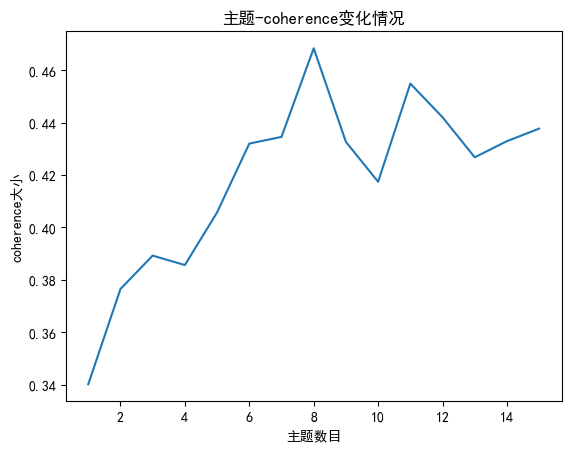

In [41]:
from tqdm import tqdm

x = range(1, 16)
y = []

for i in tqdm(x, desc="计算coherence"):
    y.append(coherence(i))

plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.title('主题-coherence变化情况')
plt.show()


In [ ]:
x = range(1,16)

y = [coherence(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()

In [ ]:
# 计算困惑度
def perplexity(topics_num):
    print("\n#######number of topics is {}#######\n".format(topics_num))
    lda_model = LdaModel(corpus, num_topics=topics_num, id2word=dictionary, passes=30)
    print(lda_model.print_topics(num_topics=topics_num, num_words=15))
    print(lda_model.log_perplexity(corpus))
    return lda_model.log_perplexity(corpus)

    #  画图主题数为1到15的图
    x = range(1, 15)
    # z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
    y = [coherence(i) for i in x]
    plt.plot(x, y)
    plt.xlabel('主题数目')
    plt.ylabel('coherence大小')
    plt.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.title('主题-coherence变化情况')
    plt.show()
